In [1]:
from gensim.models import Word2Vec
import re

In [2]:
# GPT로 Simpson 캐릭터가 들어간 문장 10개를 만듦
# GPT야, simpsons 캐릭터 이름이 들어간 랜덤 문장 10개를 생성해줘

sentences = ["Homer Simpson forgot his lunch at home, so he had to buy a burger on his way to work.",
    "Marge was busy knitting a new sweater for Bart's upcoming school play.",
    "Lisa Simpson played a beautiful saxophone solo at the school concert.",
    "Mr. Burns secretly plotted another scheme from his office at the Springfield Nuclear Power Plant.",
    "Ned Flanders offered to help Homer fix the fence between their houses.",
    "Bart Simpson tried a new prank at school, but it didn't go as planned.",
    "Milhouse and Bart spent the afternoon playing video games and forgot to do their homework.",
    "Maggie Simpson's adorable giggle filled the room as she played with her toys.",
    "Apu had a busy day at the Kwik-E-Mart, dealing with a rush of customers.",
    "Krusty the Clown decided to change his show a bit to attract a new audience."]

In [3]:
# 마침표, 쉼표, 대문자 등을 모두 제거 해줘야함

# preprocessing
# get rid of stopwords, lower case

sentences = [re.sub(r"[.',]", "", sentence).lower().split(" ") for sentence in sentences]
sentences

[['homer',
  'simpson',
  'forgot',
  'his',
  'lunch',
  'at',
  'home',
  'so',
  'he',
  'had',
  'to',
  'buy',
  'a',
  'burger',
  'on',
  'his',
  'way',
  'to',
  'work'],
 ['marge',
  'was',
  'busy',
  'knitting',
  'a',
  'new',
  'sweater',
  'for',
  'barts',
  'upcoming',
  'school',
  'play'],
 ['lisa',
  'simpson',
  'played',
  'a',
  'beautiful',
  'saxophone',
  'solo',
  'at',
  'the',
  'school',
  'concert'],
 ['mr',
  'burns',
  'secretly',
  'plotted',
  'another',
  'scheme',
  'from',
  'his',
  'office',
  'at',
  'the',
  'springfield',
  'nuclear',
  'power',
  'plant'],
 ['ned',
  'flanders',
  'offered',
  'to',
  'help',
  'homer',
  'fix',
  'the',
  'fence',
  'between',
  'their',
  'houses'],
 ['bart',
  'simpson',
  'tried',
  'a',
  'new',
  'prank',
  'at',
  'school',
  'but',
  'it',
  'didnt',
  'go',
  'as',
  'planned'],
 ['milhouse',
  'and',
  'bart',
  'spent',
  'the',
  'afternoon',
  'playing',
  'video',
  'games',
  'and',
  'forgot',

In [4]:
# train word2vec

skip_gram = Word2Vec(sentences, vector_size=300, min_count=1, window=5, sg=1)

In [5]:
# homer라는 vector가 어떤식으로 표현되는지 확인

print("{} 의 vector representation : \n{}".format('homer', skip_gram.wv.get_vector(skip_gram.wv.key_to_index['homer'])))

homer 의 vector representation : 
[-1.66068680e-03 -4.20303462e-04  1.09255337e-03 -2.18484551e-03
 -3.23499087e-03 -3.12648294e-03  3.04949097e-03  1.87829603e-03
 -1.61115616e-03 -2.80928891e-03  4.52324020e-04  9.58630932e-04
 -4.38321120e-04  4.20039461e-04 -1.44900673e-03  1.57583959e-03
  5.10560756e-04  2.96067167e-03 -3.31212161e-03 -1.82445510e-03
 -3.01285670e-03 -1.11729649e-04 -2.61634029e-03  1.71959959e-03
 -2.11100094e-03 -2.03485345e-03  1.69092277e-03 -2.72677210e-03
  4.76851710e-04 -2.43410910e-03  3.28659941e-03  2.89322482e-03
  5.95899648e-04  1.94471062e-03  1.52419391e-03 -1.98301394e-03
  3.28957522e-03 -3.26667982e-03  2.68764189e-03  9.17330268e-04
 -9.88418004e-04 -1.19753159e-03  3.04961996e-03 -1.81994250e-03
  2.79433304e-03 -1.95553945e-03  2.79207341e-03 -1.48160951e-04
  2.66201468e-03 -1.02206389e-03  2.01950571e-03  2.95562134e-03
  8.11300066e-04  4.55215428e-04  1.65783032e-03  2.71425396e-03
  2.85594515e-03  2.84643611e-03  2.36571440e-03  2.69569

In [ ]:
# 이 word2vec은 gpt로 생성한 sentences로만 train시켜서, 많은 경우의 수를 보지 못함
# word2vec 모델이 제공하는 결과 역시 굉장히 제한적임

skip_gram.wv.most_similar("homer")

[('marge', 0.14081521332263947),
 ('offered', 0.13243569433689117),
 ('games', 0.12250109761953354),
 ('her', 0.11486156284809113),
 ('nuclear', 0.10569246113300323),
 ('do', 0.09913020581007004),
 ('toys', 0.0984482690691948),
 ('office', 0.09244135022163391),
 ('bart', 0.09009940177202225),
 ('way', 0.08802291750907898)]

## <font color=yellow>직접 유사도 계산하기</font>

In [7]:
homer_vector = skip_gram.wv.get_vector(skip_gram.wv.key_to_index['homer'])
marge_vector = skip_gram.wv.get_vector(skip_gram.wv.key_to_index['marge'])

In [8]:
# 유사도 계산하기 from scratch
import numpy as np
from numpy.linalg import norm

def cosine_similarity(vector_a: np.ndarray, vector_b: np.ndarray) -> float:
    """
    두 벡터간 cosine similarity를 계산
    
    Parameters
    ----------
    vector_a : np.ndarray
        The first input vector.
    vector_b : np.ndarray
        The second input vector.

    Returns
    -------
    float
        The cosine similarity between `vector_a` and `vector_b`, which is a value between -1 and 1.

    """

    dot_product = np.dot(vector_a, vector_b)
    norm_a = norm(vector_a)
    norm_b = norm(vector_b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [9]:
cosine_similarity(homer_vector, marge_vector)

0.14081518

## <font color=yellow> Simpsons dataset을 활용한 Word2Vec 훈련</font>

In [14]:
from typing import Optional
import nltk
import re
import pandas as pd
import spacy

nltk.download('punkt')
nltk.download('stopwords')

# a, the 등 이런 것은 의미를 전달하기 보단, 문장을 완성하는데 사용되어서
# 실제 nlp분석을 할때는 그런 단어들은 다 제외를 하는게 좋음

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jjsd4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jjsd4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

nltk패키지에서 
- nltk.download('punkt')
- nltk.download('stopwords')
- 위 두개 다운 받는 이유가 불용어 제거를 위해 다운받음
- 의미가 없는 단어이기 떄문에 NLP 작업을 하기 위해, 그런 단어들은 전부 제거해야함

불용어(stop words)란?
- 자연어 처리에서 의미가 적은 단어들로 간주되는 단어들
- 예: 관사(a, an, the), 접속사(and, or, but), 전치사(of, in, on), be 동사 등

불용어를 제거하는 이유
- 분석 효율 향상: 의미 없는 단어들을 제거하면 계산 자원을 아끼고 속도도 빨라짐
- 모델 성능 향상: 주요 키워드 위주로 학습이 이루어지므로 더 나은 결과 도출 가능
- 차원 축소: 벡터화 시 차원 수가 줄어들어 과적합 방지에 도움

### <font color=red> 01_01_load data </font>

In [15]:
df = pd.read_csv('simpsons_dataset.csv')
df.shape

(158314, 2)

In [16]:
df.head()

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


In [17]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [18]:
df.loc[0, 'spoken_words']

"No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it."

### <font color=red> 01_02_preprocessing </font>

### <font color=green> 불용어, 특수문자 제거, 소문자로 변환 후 문장을 word별로 쪼갬 </font>

표제어 추출
- good, better가 있으면 이 두가지 단어의 가장 원본형태를 가져옴 
- 이 경우는 good를 가져옴

In [20]:
# lemmatize and remove the stopwords and non-alphabetic characters for each line of dialogue

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

def cleaning(doc):
    """
    Cleans a spaCy Doc object by lemmatizing its tokens and removing stop words,
    then joins the remaining tokens into a single string if there are more than two tokens left.
    
    Parameters:
    ----------
    doc : spacy.tokens.Doc
        A spaCy Doc object containing the processed text.
    
    Returns:
    ----------
    Optional : str
        A string composed of the lemmatized, non-stop tokens separated by spaces,
        if the resulting list of tokens has more than two elements. Otherwise, returns None.
    """

    txt = [token.lemma_ for token in doc if not token.is_stop]
    if len(txt) > 2:
        return ' '.join(txt)

en_core_web_sm은 spaCy에서 제공하는 영어 자연어처리 모델 중 하나
- 모델을 로드할 때 disable=['ner', 'parser']와 같이 특정 기능을 꺼서 속도를 빠르게 할 수 있음

In [ ]:
# only keep alphabets
# generator 생성
cleaner = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

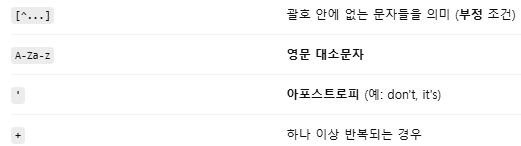
- 영문자(AZ, az)나 ' 가 아닌 문자들이 연속으로 하나 이상 있으면 공백으로 바꿔라

In [ ]:
txt = [cleaning(doc) for doc in nlp.pipe(cleaner, batch_size=5000)]

In [24]:
df.loc[0, 'spoken_words']

"No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it."

In [23]:
txt[0]

'actually little disease magazine news show natural think'

In [25]:
# dataframe에 넣어서 null이 있는 대화는 삭제
# 주로 null은 특정 행동을 했지만 대화가 없었을 때임
# drop_duplicates(): 중복된 행(row)를 제거

df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(85953, 1)

15만개의 데이터에서 8만개로 줄어듬

In [26]:
# 하나의 문장을 여러 단위의 단어로 분할
sentences = [s.split(' ') for s in df_clean['clean']]
sentences

[['actually',
  'little',
  'disease',
  'magazine',
  'news',
  'show',
  'natural',
  'think'],
 ['know', 'sure', 'like', 'talk', 'touch', 'lesson', 'plan', 'teach'],
 ['life', 'worth', 'live'],
 ['poll',
  'open',
  'end',
  'recess',
  'case',
  'decide',
  'thought',
  'final',
  'statement',
  'martin'],
 ['victory', 'party', 'slide'],
 ['mr', 'bergstrom', 'mr', 'bergstrom'],
 ['hey',
  'hey',
  'move',
  'morning',
  'new',
  'job',
  'take',
  'copernicus',
  'costume'],
 ['think', 'take', 'train', 'capital', 'city'],
 ['train', 'like', 'traditional', 'environmentally', 'sound'],
 ['yes',
  'backbone',
  'country',
  'leland',
  'stanford',
  'drive',
  'golden',
  'spike',
  'promontory',
  'point'],
 ['hey', 'thank', 'vote', 'man'],
 ['vote', 'voting', 'geek'],
 ['get', 'right', 'thank', 'vote', 'girl'],
 ['sweat', 'long', 'couple', 'people', 'right', 'milhouse'],
 ['martin', 'martin', 'like', 'recount'],
 ['want', 'sure', 'martin', 'martin'],
 ['way', 'mister', 'president'],

In [27]:
len(sentences)

85953

In [28]:
sentences[0]

['actually',
 'little',
 'disease',
 'magazine',
 'news',
 'show',
 'natural',
 'think']

### <font color=red> 01_03_word2vec train </font>

In [29]:
from gensim.models import Word2Vec

In [30]:
# 모델 정의 하기
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007)

- `window` : 문장 내에서 현재 단어와 예측 단어 사이의 최대 거리. ex) 타겟 단어의 왼쪽과 오른쪽 n번째 단어
- `vector_size` : 단어 벡터의 차원 수
- `min_count` : 이 값보다 총 절대 빈도수가 낮은 모든 단어를 무시함 - (2, 100)
- `sg` : 1은 skip-gram, 0은 CBOW method를 사용

In [31]:
# 문장에 들어있는 각 단어들을 Word2Vec 모델이 인식할 수 있는 형태로 변환
w2v_model.build_vocab(sentences)

sentences: 문장 단위로 나눠진 단어 리스트 (예: [['hello', 'world'], ['i', 'love', 'nlp']])
- 이 단계에서:
- 단어 빈도 계산
- 어휘 사전(Vocabulary) 구축

In [32]:
# 모델 훈련
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=100)

(19983909, 54001000)

실제 Word2Vec 학습 시작
- total_examples: 전체 문장의 수 (corpus_count는 build_vocab에서 자동 계산됨)
- epochs=100: 전체 데이터를 100번 반복해서 학습

### <font color=red> 01_04_모델 유사도 확인 </font>

In [34]:
# dir를 사용하면 안에 어떤 함수들이 있는지 확인 가능
# dir(w2v_model.wv)

- most_similar : 주어진 조건에 가장 적합한 단어 탐색
- similarity : 주어진 단어들의 유사도 계산
- doesnt_match : 주어진 단어들 중 가장 '덜 유사한' 단어

In [35]:
w2v_model.wv.most_similar(positive=["homer"])

[('marge', 0.3951469361782074),
 ('simpson', 0.33907175064086914),
 ('son', 0.3344176709651947),
 ('bart', 0.31850409507751465),
 ('mr', 0.30671408772468567),
 ('family', 0.2405158430337906),
 ('lisa', 0.2373936027288437),
 ('maybe', 0.23524948954582214),
 ('homie', 0.2306630164384842),
 ('right', 0.2275444120168686)]

In [36]:
w2v_model.wv.most_similar(positive=["bart"])

[('lisa', 0.5302525162696838),
 ('dad', 0.36876705288887024),
 ('milhouse', 0.32981839776039124),
 ('homer', 0.31850409507751465),
 ('mom', 0.3089239001274109),
 ('son', 0.30871835350990295),
 ('kid', 0.2780816853046417),
 ('boy', 0.27354246377944946),
 ('hearing', 0.2605777084827423),
 ('go', 0.2563229203224182)]

- Woman : homer = ___ : marge
- homer는 남자인데 앞에 woman을 넣었고, marge는 여자이기 때문에 앞에 man이 나와야함

In [37]:
w2v_model.wv.most_similar(positive=["woman", "homer"], negative=["marge"], topn=3)

[('young', 0.24773073196411133),
 ('simpson', 0.23791171610355377),
 ('modern', 0.19330406188964844)]

In [38]:
w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

[('lisa', 0.2947863042354584),
 ('mom', 0.23268789052963257),
 ('brunch', 0.23071825504302979)]

In [39]:
# 3가지 중 누가 가장 안 어울릴까
w2v_model.wv.doesnt_match(['bart', 'homer', 'marge'])

'bart'

In [40]:
w2v_model.wv.doesnt_match(['bart', 'lisa', 'marge'])

'marge'

### <font color=red> 01_05_모델 임베딩의 한계점 </font>

In [41]:
bank_vector = w2v_model.wv.get_vector(w2v_model.wv.key_to_index['bank'])

In [42]:
bank_vector 


array([ 3.4709916e-01,  6.5738969e-02,  5.4688144e-02, -6.7432302e-01,
        7.1827836e-02, -3.7335563e-01,  1.2385958e+00, -7.3787403e-01,
        9.7090590e-01, -7.0602089e-01, -1.1023229e+00,  1.8382472e-01,
       -3.4806365e-01, -4.2871299e-01,  7.8698540e-01,  7.8014636e-01,
       -5.6400645e-01,  7.0236504e-01,  5.6775641e-01,  5.8134389e-01,
        1.1687599e+00,  1.4732058e-01,  1.0920677e+00,  7.0334874e-02,
       -7.8244227e-01, -4.4924039e-01, -4.6695372e-01,  5.8014947e-01,
        1.2101402e+00, -3.1124818e-01, -3.6349624e-01, -4.6092117e-01,
        1.3602269e+00, -6.5082145e-01,  2.7520445e-01, -5.3550845e-01,
        7.9631186e-01,  6.3566273e-01,  5.5366254e-01,  4.8729655e-01,
        5.2455884e-01, -5.3447127e-01,  1.9309245e-01,  4.5297694e-01,
       -6.0303789e-01,  6.3297445e-01, -1.9871414e-02,  6.0723585e-01,
        6.9325370e-01, -5.4604673e-01,  4.8999019e-02, -3.0506161e-01,
       -1.0751554e+00, -9.7872740e-01,  2.7344612e-02, -1.1919781e+00,
      

- 우리가 사용하는 모든 단어는 context에 따라 의미가 다르다
- 단어 embedding의 경우 이런 유연성을 확보하지 못 함
    - 배를 깎아 먹었다 / 배가 고프다 / 배 멀미를 하다

### <font color=red> 01_06_sentence embeddings </font>

In [43]:
from transformers import BertTokenizer, BertModel
import torch

In [44]:
# pre-trained model tokenizer와 and bert model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # smaller & uncased model
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\jjsd4\miniconda3\envs\torch_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jjsd4\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [45]:
# bank가 들어간 유사한 문장 두 개
sentence1 = "I deposited money at the bank."
sentence2 = "The ducks swam to the river bank."

In [46]:
# 문장을 BERT가 인식할 수 있는 형태로 Tokenize
encoded_input1 = tokenizer(sentence1, return_tensors='pt') # pytorch
encoded_input2 = tokenizer(sentence2, return_tensors='pt')

마지막 hidden state가 가장 많은 정보를 가지고 있기 때문에, 우리는 나중에 hidden state를 활용할 것임

In [47]:
encoded_input1

{'input_ids': tensor([[  101,  1045, 14140,  2769,  2012,  1996,  2924,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

- `input_ids` : 각 단어별로 매핑된 key. 101은 문장의 시작을, 102는 문장의 끝을 의미
- `token_type_ids` : 문장 번호
- `attention_mask` : attention을 가져야 하는 단어는 1, 그렇지 않은 단어는 0. (만약 input이 실제 단어들이라면 1)

In [48]:
# embedding 생성!
with torch.no_grad():
    output1 = model(**encoded_input1)
    output2 = model(**encoded_input2)

In [49]:
# embedding 내에서 bank라는 단어 찾아오기 (문장의 5번째에 있는 단어)
bank_embedding_sentence1 = output1.last_hidden_state[0, 5, :]
bank_embedding_sentence2 = output2.last_hidden_state[0, 5, :]

In [50]:
# cosine similarity 계산

similarity = cosine_similarity(bank_embedding_sentence1, bank_embedding_sentence2)
# print("Embedding for 'bank' in sentence 1:", bank_embedding_sentence1)
# print("Embedding for 'bank' in sentence 2:", bank_embedding_sentence2)
print("Cosine similarity between the two embeddings:", similarity)

Cosine similarity between the two embeddings: 0.59224105
